### Tugas 1: Multiple Linear Regression


Identifikasi Variabel:

Variabel Bebas:
* Age: Umur pasien
* BMI: Indeks Massa Tubuh pasien
* Smoker: Apakah pasien perokok (yes/no)

Variabel Target:
* Charges: Biaya medis personal

In [6]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Baca data 
data = pd.read_csv('assets/docs/insurance.csv')
# Menampilkan data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

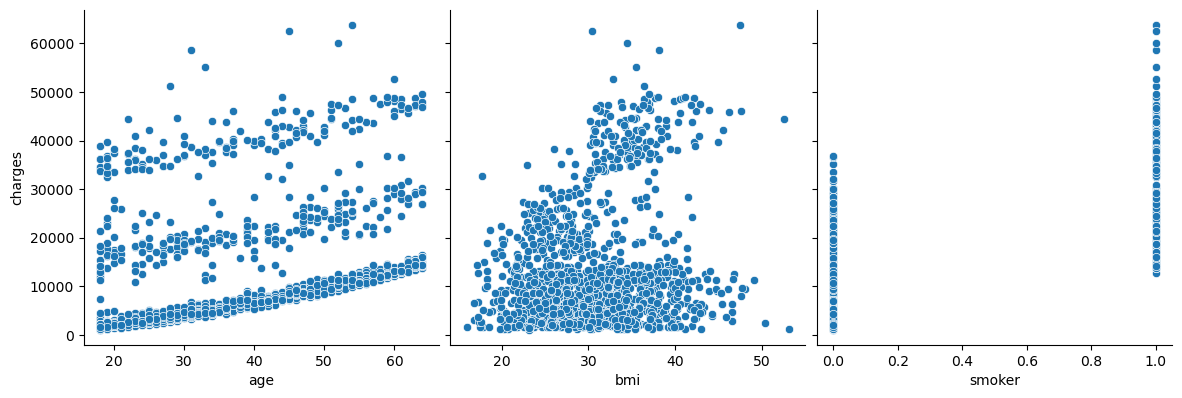

In [7]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age','bmi','smoker'],
             y_vars='charges', height=4,aspect=1,kind='scatter')
plt.show()

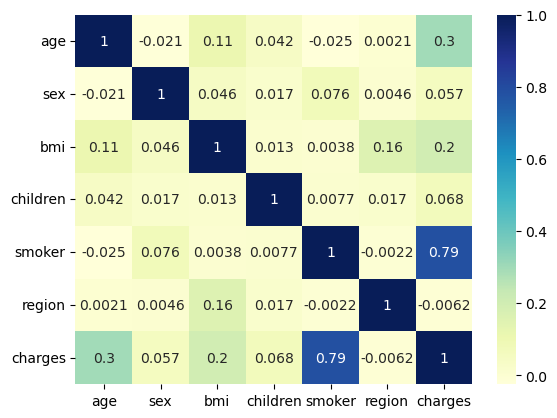

In [8]:
# Pilih kolom numerik dari data
numeric_data = data.select_dtypes(include=[float, int])

# Buat heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

>Identifikasi Variabel:
>
>Variabel Bebas:
>* Age: Umur pasien
>* BMI: Indeks Massa Tubuh pasien
>* Smoker: Apakah pasien perokok (yes/no)
>
>Variabel Target:
>* Charges: Biaya medis personal

In [9]:
# Menggunakan 3 varibel indpendent (age, bmi, smoker)
X = data[['age','bmi','smoker']]

# Variabel dependent
y = data['charges']

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [10]:
# Pembgian data latih dan data uji dengan proporsi 8:2
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

3. Lakukan feature scaling jika diperlukan.

In [11]:
# Menginisialisasi scaler untuk setiap fitur
from sklearn.discriminant_analysis import StandardScaler


scaler_age = StandardScaler()     # Untuk fitur 'age' (umur)
scaler_bmi = StandardScaler()     # Untuk fitur 'bmi' (indeks massa tubuh)
scaler_smoker = StandardScaler()  # Untuk fitur 'smoker' (perokok)

# Melakukan fitting dan transformasi pada setiap fitur secara individu pada data training
x_train_scaled = X_train.copy()   # Membuat salinan dari X_train untuk di-scale
x_train_scaled['age'] = scaler_age.fit_transform(X_train[['age']])   # Scale kolom 'age'
x_train_scaled['bmi'] = scaler_bmi.fit_transform(X_train[['bmi']])   # Scale kolom 'bmi'
x_train_scaled['smoker'] = scaler_smoker.fit_transform(X_train[['smoker']])  # Scale kolom 'smoker'

# Melakukan transformasi pada data testing menggunakan scaler yang telah di-fit dari data training
x_test_scaled = X_test.copy()   # Membuat salinan dari X_test untuk di-scale
x_test_scaled['age'] = scaler_age.transform(X_test[['age']])    # Scale kolom 'age' pada data testing
x_test_scaled['bmi'] = scaler_bmi.transform(X_test[['bmi']])    # Scale kolom 'bmi' pada data testing
x_test_scaled['smoker'] = scaler_smoker.transform(X_test[['smoker']])  # Scale kolom 'smoker' pada data testing

# print beberapa baris pertama dari data asli dan data yang sudah di-scale untuk X_train
print("Original X_train:")  # Menampilkan data X_train sebelum di-scale
print(X_train.head())

print("\nScaled X_train:")  # Menampilkan data X_train setelah di-scale
print(x_train_scaled.head())

Original X_train:
      age    bmi  smoker
560    46  19.95       0
1285   47  24.32       0
1142   52  24.86       0
969    39  34.32       0
486    54  21.47       0

Scaled X_train:
           age       bmi    smoker
560   0.472227 -1.756525 -0.508747
1285  0.543313 -1.033082 -0.508747
1142  0.898745 -0.943687 -0.508747
969  -0.025379  0.622393 -0.508747
486   1.040918 -1.504893 -0.508747


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [12]:
reg = LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [13]:
# Training model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          1.65e-310
Time:                        11:52:30   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.171e+04   1061.511    -11.029      0.000   -1.38e+04   -9624.913
age          259.4102     13.470     19.258      0.000     232.979     285.841
bmi          326.4502     31.327     10.421      0.000     264.981     387.920
smoker      2.368e+04    465.574     50.852      0.000    2.28e+04    2.46e+04
==============================================================================
Omnibus:                      252.603   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.423
Skew:                           1.256   Prob(JB):                    1.70e-133
Kurtosis:                       5.720   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

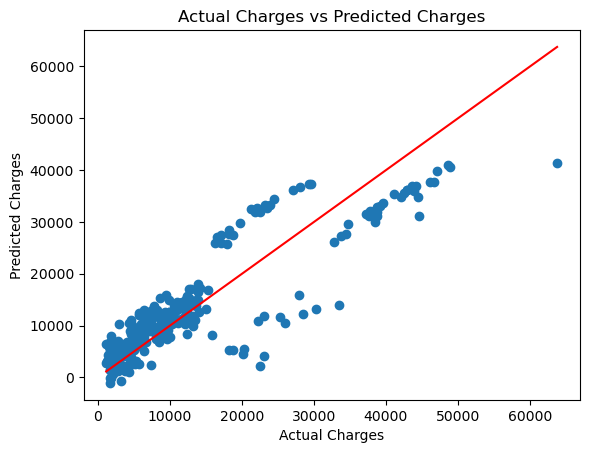

In [15]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(y_test, y_test_pred)  # Membuat plot scatter antara nilai aktual (y_test) dan nilai prediksi (y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # Membuat garis diagonal untuk referensi (nilai prediksi yang sempurna)
plt.xlabel('Actual Charges')  # Label untuk sumbu x (nilai aktual)
plt.ylabel('Predicted Charges')  # Label untuk sumbu y (nilai prediksi)
plt.title('Actual Charges vs Predicted Charges')  # Judul plot
plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [16]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y_test

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_test_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_test_pred)

# Menghitung R-squared
r2 = r2_score(y_actual, y_test_pred)

print("R-squared:", r2)
print("MSE:", mse)
print("MAE:", mae)

R-squared: 0.7776932310583374
MSE: 34512843.88022791
MAE: 4260.560091099398
